In [7]:
import os
import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
contacts = pd.read_csv(os.path.join('dataset', 'contacts.csv'))
contacts.sample(3)

,From,To,weight,type,place,city/village
4,Win Ko,Than Aung,0.20,3 - 6 ft,Site C,City A
10,Than Aung,San Win,0.23,3 - 6 ft,Side D,City A
13,Ma Aye,Than Hla,0.60,< 3 ft,Site B,City A


C:\Users\akw\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


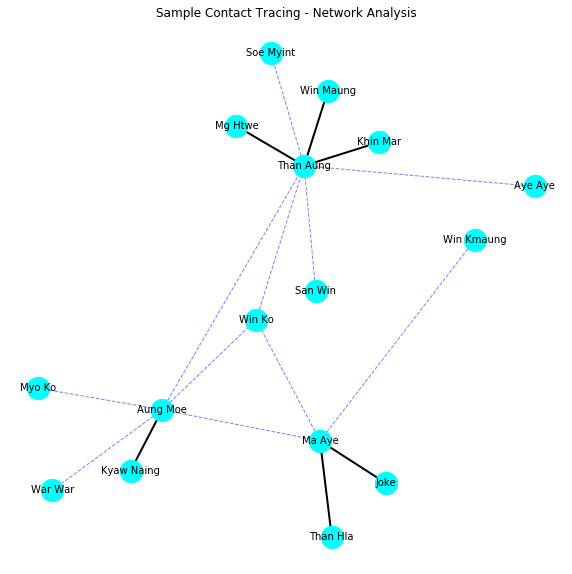

In [9]:
G = nx.from_pandas_edgelist(contacts, source='From', target='To', edge_attr='weight')

e_high_risk = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
e_low_risk = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

fig = plt.figure(figsize=(10,10))
# nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='cyan')

# edges
nx.draw_networkx_edges(G, pos, edgelist=e_high_risk,
                       width=2)
nx.draw_networkx_edges(G, pos, edgelist=e_low_risk,
                       width=1, alpha=0.5, edge_color='b', style='dashed')

# Add Data Label
nx.draw_networkx_labels(G, pos, font_size=10)

# Remove Plot axis
plt.axis('off')
plt.title('Sample Contact Tracing - Network Analysis')
plt.show()